# 10.9.2 Multilayer Network on the MNIST Digit Data
The `torchvision` package comes with a number of example datasets,
including the `MNIST`  digit data. Our first step is to retrieve
the training and test data sets; the `MNIST()` function within
`torchvision.datasets` is provided for this purpose. The
data will be downloaded the first time this function is executed, and stored in the directory `data/MNIST`.

**I am using data from keras.datasets.**

## Introduction
In this comparison, we will evaluate the performance of logistic regression and artificial neural networks (ANN) on the MNIST dataset. We will compare the accuracy scores of both models and discuss the results.

### LOADING LIBRARIES
We are loading the necessary libraries for data analysis, modeling, and visualization. These libraries will be used for data processing, model training, and evaluation.

In [37]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


## Introduction

The MNIST dataset is a widely used benchmark for handwritten digit recognition. It consists of 70,000 images of handwritten digits (0-9) with a size of 28x28 pixels. The goal of this project is to develop a multilayer neural network using Keras to recognize handwritten digits.

## Dataset

Training Set: 60,000 images
Test Set: 10,000 images
Image Size: 28x28 pixels
Classes: 10 (0-9)


### Loading Data
**Train test split:**
splits your dataset into two parts: training data and test data.

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()


In [4]:
X_train.shape


(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0].shape #first Image pixel shape


(28, 28)

In [7]:
X_train[0] #first Image pixel value

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

y_test


5


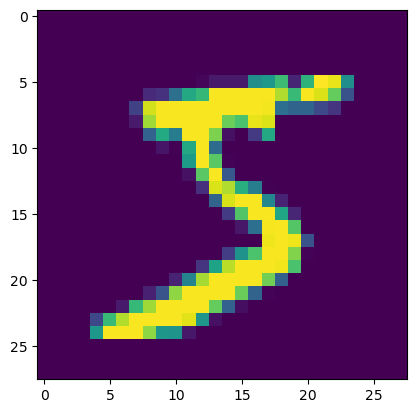

0


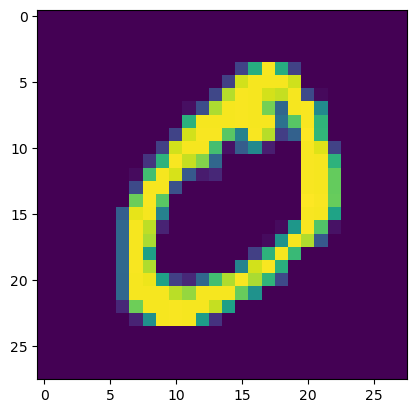

4


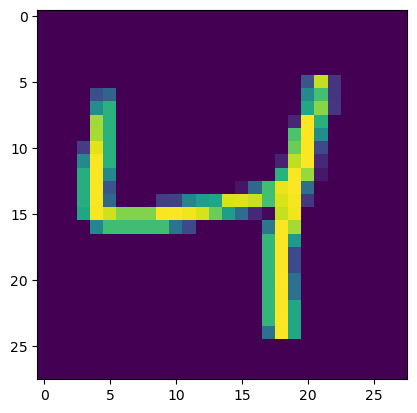

1


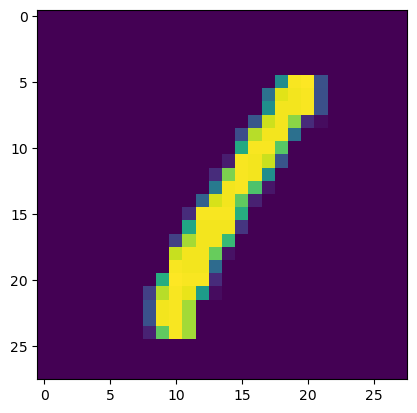

In [8]:
#digit at 0th index
print(y_train[0])
plt.imshow(X_train[0])
plt.show()

#digit at 1st index

print(y_train[1])
plt.imshow(X_train[1])
plt.show()

#digit at 2nd index

print(y_train[2])
plt.imshow(X_train[2])
plt.show()

#digit at 3rd index

print(y_train[3])
plt.imshow(X_train[3])
plt.show()

In [9]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(10000, 28, 28)
(60000, 28, 28)
(10000,)
(60000,)


### Scaling data
all pixel value is between 0-255

hence we will bring all data between 0 to 1 by deviding pixel values by 255**

In [10]:
# Normalize input data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## Define the model architecture
### Neural Network Architecture
The neural network architecture is a crucial component of the MNIST model. It consists of multiple layers that process the input data in a hierarchical manner.




### Layer 1: Flatten Layer
**Input Shape:** (28, 28)

**Output Shape:** (784,)

Function: Flattens the 28x28 input image into a 1D array of 784 pixels.

### Layer 2: Dense Layer with ReLU Activation and Dropout
**Input Shape:** (784,)

**Output Shape:** (256,)
Function: Applies a dense (fully connected) layer with 256 units, ReLU activation, and dropout with a rate of 0.4.

ReLU Activation: Introduces non-linearity to the model, allowing it to learn more complex relationships between inputs and outputs.

Dropout: Randomly sets a fraction rate of 0.4 of the output units to zero during training, helping to prevent overfitting.

### Layer 3: Dense Layer with ReLU Activation and Dropout
**Input Shape:**  (256,)

**Output Shape:** (128,)

Function: Applies a dense (fully connected) layer with 128 units, ReLU activation, and dropout with a rate of 0.3.

ReLU Activation: Introduces non-linearity to the model, allowing it to learn more complex relationships between inputs and outputs.

Dropout: Randomly sets a fraction rate of 0.3 of the output units to zero during training, helping to prevent overfitting.

### Layer 4: Output Layer
**Input Shape:** (128,)

**Output Shape:**  (10,)

Function: Applies a dense (fully connected) layer with 10 units, representing the 10 possible digit classes.

### Model Summary
The neural network architecture consists of four layers:

Flatten layer

Dense layer with ReLU activation and dropout (256 units)

Dense layer with ReLU activation and dropout (128 units)

Output layer (10 units)

This architecture is designed to learn complex patterns in the MNIST dataset and classify handwritten digits with high accuracy.

In [11]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))


/home/amarja/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1727646827.978892 1399319 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-30 03:23:48.004428: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

We see that in the first layer, each 1x28x28 image is flattened, then mapped to 256 dimensions where we apply a ReLU activation with 40% dropout. A second layer maps the first layer’s output down to 128 dimensions, applying a ReLU activation with 30% dropout. Finally, the 128 dimensions are mapped down to 10, the number of classes in the MNIST data. 

In [13]:
# Compile the Neural Network model

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['Accuracy'])


**Hyperparameters:** The hyperparameters used in your project are:

- **Number of Neurons:** The number of neurons in each dense layer is a hyperparameter that needs to be tuned. In this case, the numbers are 256, 128, and 10.

- **Activation Functions:** The activation functions used in each layer are also hyperparameters. In this case, the ReLU activation function is used for the first two dense layers, and no activation function is used for the last dense layer.

- **Dropout Rates:** The dropout rates used in the dropout layers are hyperparameters that need to be tuned. In this case, the dropout rates are 0.4 and 0.3.


**Optimizer:** The optimizer used in your project is the Adam optimizer, which is a popular choice for deep learning models. The Adam optimizer is a stochastic gradient descent optimizer that adapts the learning rate for each parameter based on the magnitude of the gradient.

In [14]:
# Train the Neural Network model on the  training data
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)



Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Accuracy: 0.8186 - loss: 0.5744 - val_Accuracy: 0.9612 - val_loss: 0.1321
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9445 - loss: 0.1835 - val_Accuracy: 0.9689 - val_loss: 0.1011
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.9555 - loss: 0.1458 - val_Accuracy: 0.9730 - val_loss: 0.0928
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.9629 - loss: 0.1204 - val_Accuracy: 0.9737 - val_loss: 0.0904
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.9659 - loss: 0.1122 - val_Accuracy: 0.9762 - val_loss: 0.0872
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Accuracy: 0.9727 - loss: 0.0931 - val_Accuracy: 0.9760 - val_loss: 0.0810
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.9715 - loss: 0.0918 - val_Accuracy: 0.9750 - val_loss: 0.0904
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - Accuracy: 0.9743 - loss: 0.0834 - 

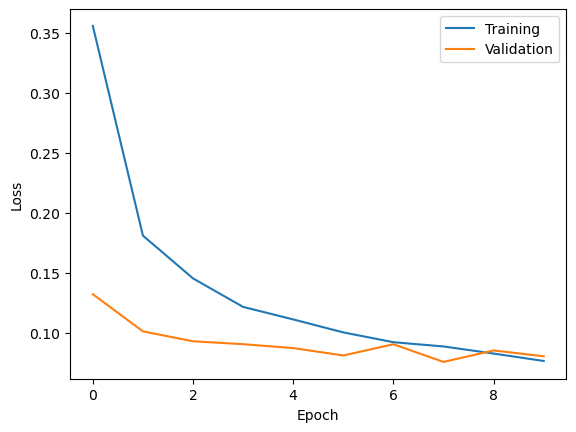

In [18]:
# Plot the training and validation Loss
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

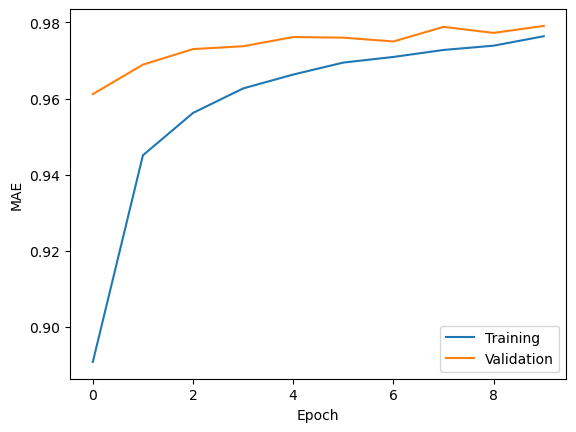

In [19]:
# Plot the training and validation Accuracy
plt.plot(history.history['Accuracy'], label='Training')
plt.plot(history.history['val_Accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [15]:
# Use the trained model to make predictions on the  test data
#returns the predicted probabilities for each class, which are stored in the y_pob variable.
y_pob=model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step


In [33]:
#This line of code extracts the class labels from the predicted probabilities. 
#The argmax method returns the index of the maximum value along the specified axis (in this case, axis=1). 
#This gives us the class label with the highest predicted probability.
y_pred=y_pob.argmax(axis=1)


In [34]:
MLP=accuracy_score(y_test,y_pred)
print("Accuracy Score:" ,MLP)

Accuracy Score: 0.9797


ANN Accuracy Score

The accuracy score of the ANN model is 0.9797. This means that the model correctly classified 97.97% of the test data.

# Multiclass Logistic Regression Model for MNIST Data using Keras
This code is similar to the ANN code, but with a few key differences:

- The output layer has a softmax activation function, which is suitable for multiple logistic regression.

- The loss function is categorical cross-entropy, which is suitable for multiple logistic regression.

- The model has only one hidden layer, which is not necessary for multiple logistic regression.

In [29]:
model1=Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(10,activation='softmax'))

/home/amarja/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile the Neural Network model

model1.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['Accuracy'])

In [24]:
# Train the Neural Network model on the  training data
history1=model1.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - Accuracy: 0.7946 - loss: 0.7887 - val_Accuracy: 0.9135 - val_loss: 0.3196
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - Accuracy: 0.9094 - loss: 0.3270 - val_Accuracy: 0.9208 - val_loss: 0.2898
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - Accuracy: 0.9167 - loss: 0.2974 - val_Accuracy: 0.9225 - val_loss: 0.2751
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - Accuracy: 0.9189 - loss: 0.2853 - val_Accuracy: 0.9242 - val_loss: 0.2716
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step - Accuracy: 0.9256 - loss: 0.2684 - val_Accuracy: 0.9252 - val_loss: 0.2676
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step - Accuracy: 0.9268 - loss: 0.2636 - val_Accuracy: 0.9277 - val_loss: 0.2654
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - Accuracy: 0.9279 - loss: 0.2599 - val_Accuracy: 0.9299 - val_loss: 0.2632
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - Accuracy: 0.9309 -

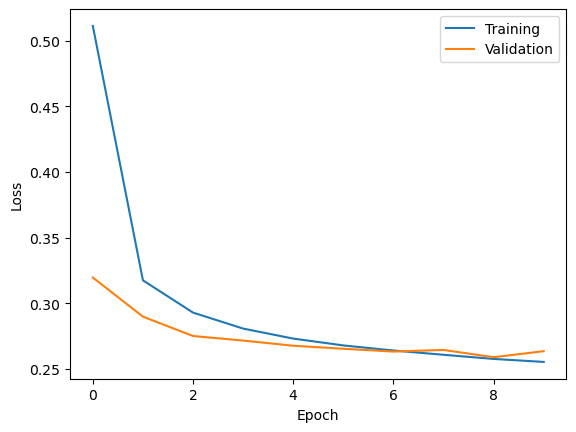

In [31]:
# Plot the training and validation Loss
plt.plot(history1.history['loss'], label='Training')
plt.plot(history1.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

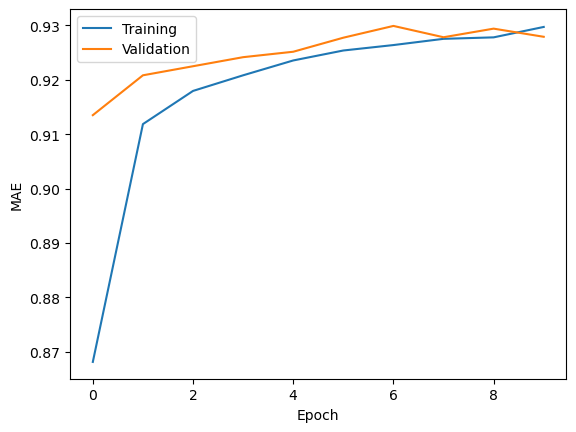

In [32]:
# Plot the training and validation Accuracy
plt.plot(history1.history['Accuracy'], label='Training')
plt.plot(history1.history['val_Accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [25]:
# Use the trained model to make predictions on the  test data
#returns the predicted probabilities for each class, which are stored in the y_pob variable.

y_pob1=model1.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step


In [35]:
#This line of code extracts the class labels from the predicted probabilities. 
#The argmax method returns the index of the maximum value along the specified axis (in this case, axis=1). 
#This gives us the class label with the highest predicted probability.

y_pred1=y_pob1.argmax(axis=1)

In [36]:
MLgR=accuracy_score(y_test,y_pred1)
print("Accuracy Score:" ,MLgR)

Accuracy Score: 0.927


### Logistic Regression Accuracy Score

The accuracy score of the logistic regression model is 0.927. 

This means that the model correctly classified 92.7% of the test data.

# Comparison of Accuracy Scores

    Model	                           Accuracy Score
    Logistic Regression	                    0.927
    Artificial Neural Networks (ANN)	   0.9797

### Discussion

Based on the results, we can see that the ANN model outperforms the logistic regression model in terms of accuracy. 

The ANN model achieved an accuracy score of 0.9797, which is significantly higher than the accuracy score of the logistic regression model (0.927).

This is not surprising, as ANNs are generally more powerful than logistic regression models, especially when dealing with complex datasets like MNIST. 
ANNs can learn non-linear relationships between the input features and the output variable, which makes them more effective in classifying handwritten digits.


## Conclusion

In conclusion, the ANN model is a better choice than logistic regression for classifying handwritten digits from the MNIST dataset. The ANN model achieved a higher accuracy score than the logistic regression model, which indicates that it is more effective in classifying the data.

